In [1]:
import torch

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing

dataset = load_breast_cancer()
data, target = dataset.data, dataset.target.astype("float")
data = preprocessing.StandardScaler().fit_transform(data)

In [3]:
data.shape

(569, 30)

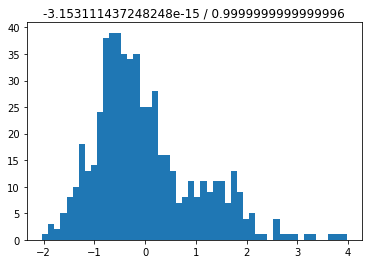

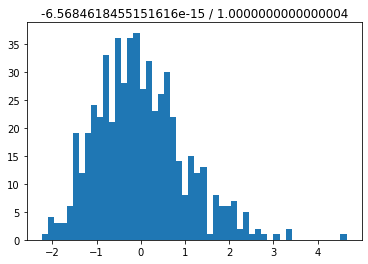

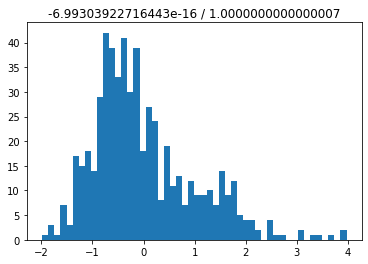

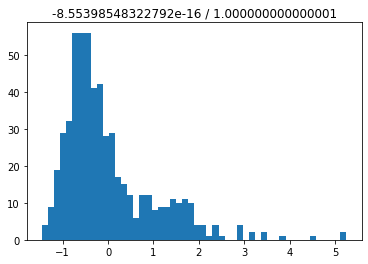

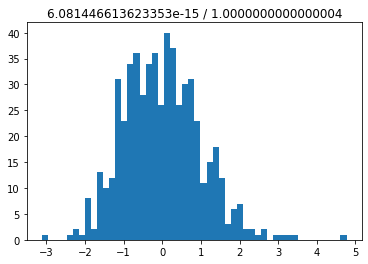

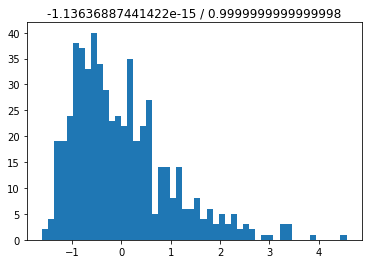

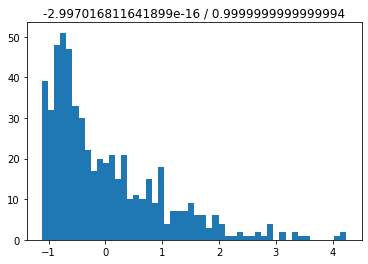

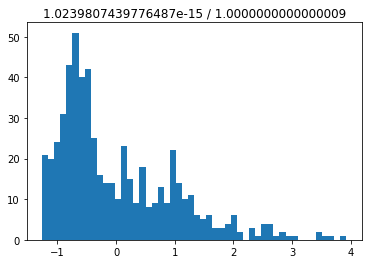

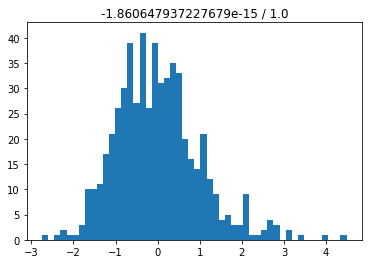

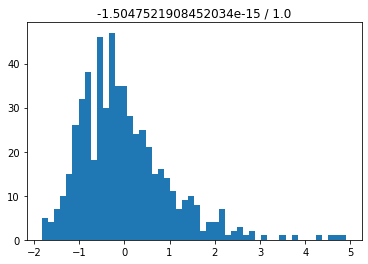

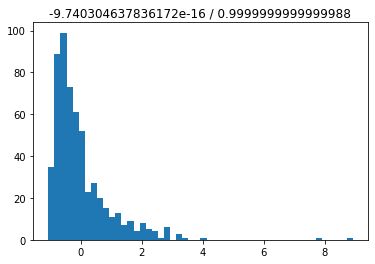

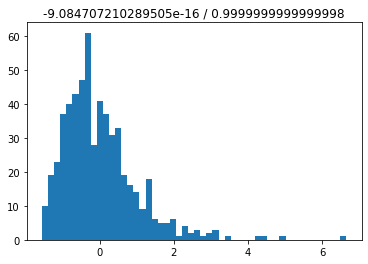

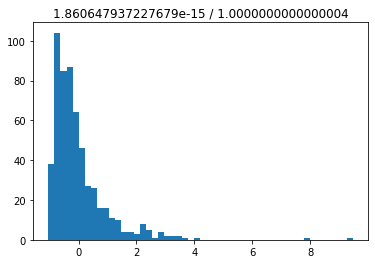

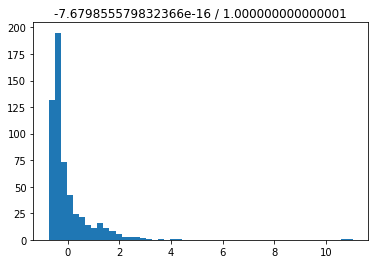

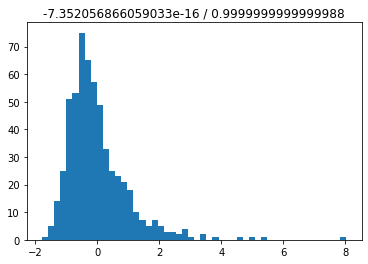

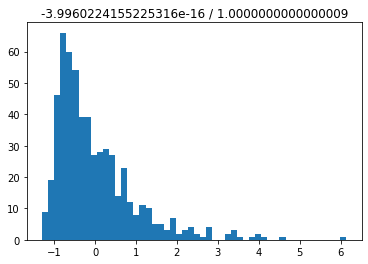

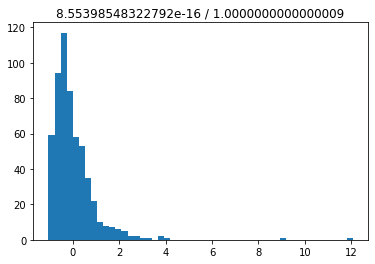

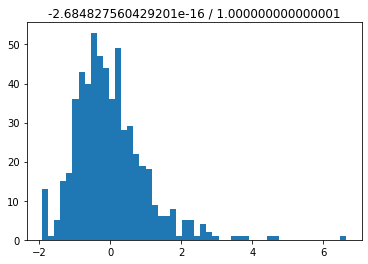

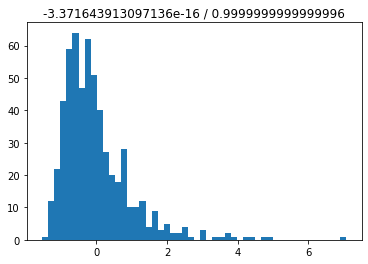

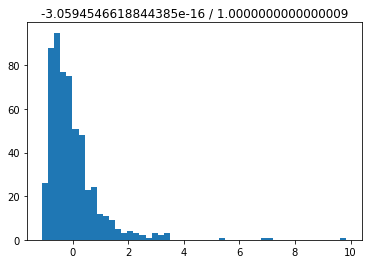

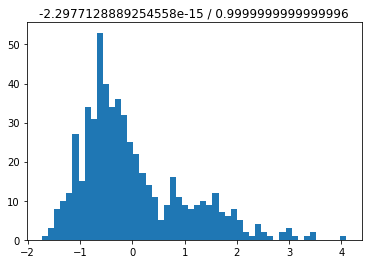

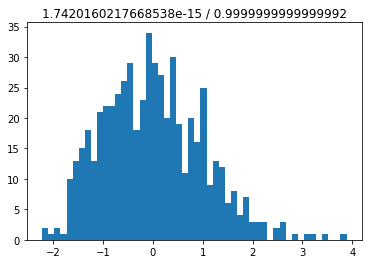

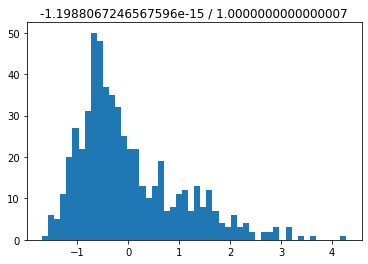

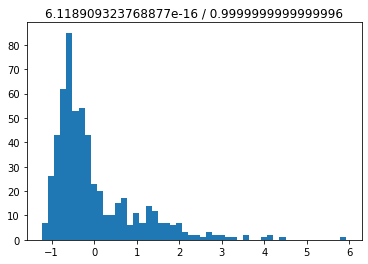

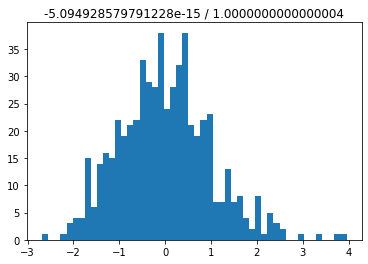

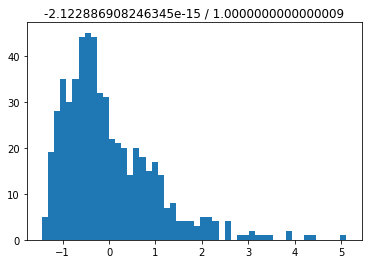

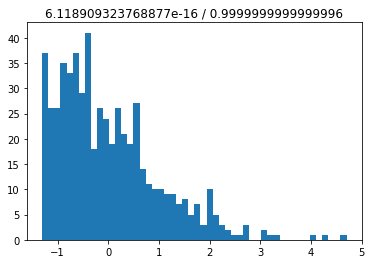

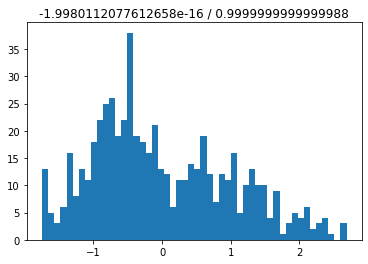

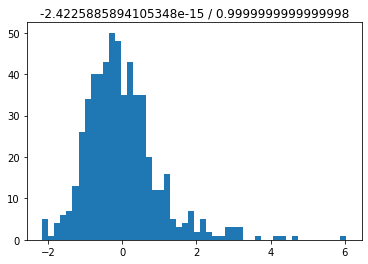

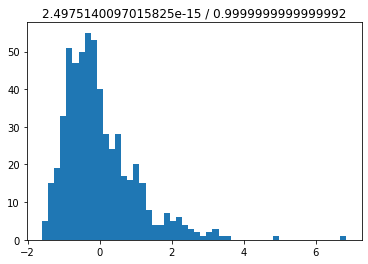

In [5]:
import matplotlib.pyplot as plt
for i in range(data.shape[1]):
  plt.title("{} / {}".format(data[:,i].mean(), data[:, i].var()))
  plt.hist(data[:,i], bins=50)
  plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [7]:
print(y_train)
print("====")
print(y_val)
print("====")
print(y_test)

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.

In [8]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, data, target):
    self.data = data
    self.target = target
  
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self, idx):
    return torch.FloatTensor(self.data[idx]), \
    torch.FloatTensor([self.target[idx]])

In [9]:
from torch.utils.data import DataLoader

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# LOW CODE

In [10]:
def forward(X, W1, b1, W2, b2, W3, b3):
  out = torch.matmul(X, W1) + b1
  out = torch.sigmoid(out)
  out = torch.matmul(out, W2) + b2
  out = torch.sigmoid(out)
  out = torch.matmul(out, W3) + b3
  out = torch.sigmoid(out)
  return out

In [11]:
W1 = torch.randn((30, 50), requires_grad=True)
b1 = torch.zeros(50, requires_grad=True)

W2 = torch.randn((50, 20), requires_grad=True)
b2 = torch.zeros(20, requires_grad=True)

W3 = torch.randn((20, 1), requires_grad=True)
b3 = torch.zeros(1, requires_grad=True)

In [12]:
learning_rate = 0.001
epochs = 300

train_costs = []
val_costs = []
for epoch in range(epochs):
  temp_cost = 0.
  for X, y in train_dataloader:
    # step1 : Forward
    logit = forward(X, W1, b1, W2, b2, W3, b3)
    # step2 : Loss
    losses = -(y * torch.log(logit) + (1. - y) * torch.log(1. - logit))
    cost = losses.mean()
    temp_cost += cost.item()
    # step3 : Backpropagation
    W1.grad, b1.grad, W2.grad, b2.grad = [None] * 4
    cost.backward()
    # step4 : Update parameters
    W1.data -= learning_rate * W1.grad
    b1.data -= learning_rate * b1.grad
    W2.data -= learning_rate * W2.grad
    b2.data -= learning_rate * b2.grad
  temp_cost /= len(train_dataloader)
  train_costs.append(temp_cost)

  temp_cost = 0.
  for X, y in val_dataloader:
    logit = forward(X, W1, b1, W2, b2, W3, b3)
    losses = -(y * torch.log(logit) + (1 - y) * torch.log(1 - logit))
    cost = losses.mean()
    temp_cost += cost.item()
  temp_cost /= len(val_dataloader)
  val_costs.append(temp_cost)

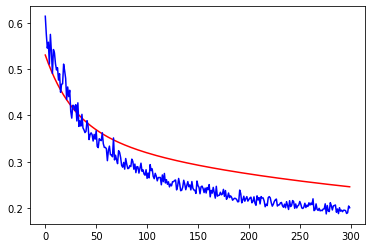

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_costs, c="red")
plt.plot(val_costs, c="blue")
plt.show()

In [14]:
correct_count = 0
for i, (X, y) in enumerate(test_dataloader):
  logit = forward(X, W1, b1, W2, b2, W3, b3)
  print(y)
  print(logit)
  logit[logit < 0.5] = 0.
  logit[logit >= 0.5] = 1.

  correct_count += (y == logit).sum()
print(f"{correct_count} / {len(test_dataloader.dataset)}")

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.]])
tensor([[0.9187],
        [0.1538],
        [0.1733],
        [0.9021],
        [0.9263],
        [0.1819],
        [0.9299],
        [0.7614],
        [0.5133],
        [0.9563],
        [0.5035],
        [0.9052],
        [0.9671],
        [0.7368],
        [0.9671],
        [0.1942]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.]])
tensor([[0.9735],
        [0.9746],
        [0.9865],
        [0.9122],
        [0.8817],
        [0.8015],
        [0.2925],
        [0.5969],
        [0.9523],
        [0.9581],
        [0.4255],
        [0.1745],
        [0.9792]], grad_fn=<SigmoidBackward0>)
27 / 29


# HIGH CODE

In [291]:
class Model1(torch.nn.Module):
  def __init__(self):
    super(Model1, self).__init__()
    self.layer1 = torch.nn.Linear(30, 75)
    self.layer2 = torch.nn.Linear(75, 50)
    self.layer3 = torch.nn.Linear(50, 25) 
    self.layer4 = torch.nn.Linear(25, 1) 
    
    self.activate = torch.nn.ReLU()
    self.activate_last = torch.nn.Sigmoid()
  
  def forward(self, X):
    out = self.activate(self.layer1(X))
    out = self.activate(self.layer2(out))
    out = self.activate(self.layer3(out))
    out = self.activate_last(self.layer4(out))
    return out
model = Model1()

In [292]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.99 ** epoch)

In [293]:
loss_fn = torch.nn.BCELoss()
#loss_fn = torch.nn.BCEWithLogitsLoss()

In [294]:
model

Model1(
  (layer1): Linear(in_features=30, out_features=75, bias=True)
  (layer2): Linear(in_features=75, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=25, bias=True)
  (layer4): Linear(in_features=25, out_features=1, bias=True)
  (activate): ReLU()
  (activate_last): Sigmoid()
)

In [295]:
epochs = 300
train_losses = []
val_losses = []
lrs = []
for epoch in range(epochs):
  temp_loss = 0.
  for X, y in train_dataloader:
    model.train()
    pred = model.forward(X.float())
    loss = loss_fn(pred, y.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    temp_loss += loss.item()
  temp_loss /= len(train_dataloader)
  train_losses.append(temp_loss)
  temp_loss = 0.
  for X, y in val_dataloader:
    model.eval()
    with torch.no_grad():
      pred = model.forward(X)
      loss = loss_fn(y, pred)
      temp_loss += loss.item()
  temp_loss /= len(val_dataloader)
  val_losses.append(temp_loss)
  lrs.append(optimizer.param_groups[0]['lr'])
  scheduler.step()


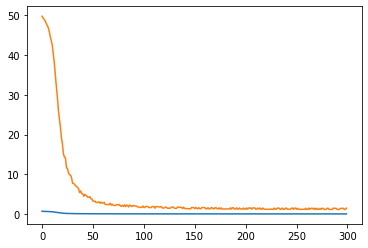

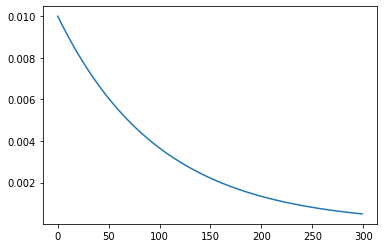

In [296]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

plt.plot(lrs)
plt.show()

In [297]:
correct_count = 0
for X, y in test_dataloader:
  pred = model.forward(X)
  pred[pred < 0.5] = 0.
  pred[pred >= 0.5] = 1.
  correct_count += (pred == y).sum().item()
print(f"{correct_count} / {len(test_dataloader.dataset)}")

28 / 29


torch.Tensor